<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Comparing Clustering Algorithm Effectiveness

_Authors: Tim Book (DC), Kiefer Katovich (SF)_

---

In this lab, you'll test three of the clustering algorithms we've covered on seven data sets that are specifically designed to evaluate clustering algorithm effectiveness.

This lab is exploratory and heavy on data visualization.


In [1]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

plt.style.use('fivethirtyeight')

%matplotlib inline

---

### 1) Load the data sets.

Each of the seven data sets have three columns:

    x
    y
    label
    
Because they each only have two variables, they're easy to examine visually. You’ll compare the “true” labels for the data to the clusters the algorithms find.

In [2]:
# Load datasets
flame = pd.read_csv('./datasets/flame.csv')
agg = pd.read_csv('./datasets/aggregation.csv')
comp = pd.read_csv('./datasets/compound.csv')
jain = pd.read_csv('./datasets/jain.csv')
path = pd.read_csv('./datasets/pathbased.csv')
r15 = pd.read_csv('./datasets/r15.csv')
spiral = pd.read_csv('./datasets/spiral.csv')

---

### 2) Plot each of the data sets with colored true labels.

The data sets have different numbers of unique labels, so you'll need to figure out how many there are for each and color the clusters accordingly (for example, `r15` has 15 different clusters).

You might find [this](https://matplotlib.org/examples/color/colormaps_reference.html) help page on colormaps useful!

In [3]:
# Print the first 2 rows of each dataframe
print(flame.head(2))
print(agg.head(2))
print(comp.head(2))
print(jain.head(2))
print(path.head(2))
print(r15.head(2))
print(spiral.head(2))

      x      y  label
0  1.85  27.80      1
1  1.35  26.65      1
       x      y  label
0  15.55  28.65      2
1  14.90  27.55      2
       x      y  label
0  26.75  22.15      1
1  29.80  22.15      1
      x      y  label
0  0.85  17.45      2
1  0.75  15.60      2
       x     y  label
0  11.25  5.05      1
1  10.95  4.70      1
        x       y  label
0   9.802  10.132      1
1  10.350   9.768      1
       x     y  label
0  31.95  7.95      3
1  31.15  7.30      3


In [4]:
# Print the unique labels of each dataframe
print('flame', flame['label'].unique())
print('agg', agg['label'].unique())
print('comp', comp['label'].unique())
print('jain', jain['label'].unique())
print('path', path['label'].unique())
print('r15', r15['label'].unique())
print('spiral', spiral['label'].unique())

flame [1 2]
agg [2 7 4 3 6 1 5]
comp [1 2 3 4 5 6]
jain [2 1]
path [1 3 2]
r15 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
spiral [3 1 2]


In [5]:
def plot_clusters(df, title):
    """
    Plot clusters from a DataFrame using a scatter plot.
    
    Parameters:
        df (DataFrame): The DataFrame containing data points and their associated cluster labels.
        title (str): The title of the plot.
    """
    # Determine the number of unique clusters
    n_clusters = df.label.nunique()
    
    # Create a new figure and axis
    fig, ax = plt.subplots(figsize=(5, 5))
    
    # Generate a range of colors for each cluster
    colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters))
    
    # Iterate through each unique cluster label and corresponding color
    for label, color in zip(df.label.unique(), colors):
        # Select data points corresponding to the current cluster label
        X = df[df.label == label]
        
        # Create a scatter plot for the current cluster with specified properties
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], s=70, 
                   color=color, label=label, alpha=0.9)
        
    # Set the plot title and font size
    ax.set_title(title, fontsize=20)
    
    # Display the legend in the lower right corner
    ax.legend(loc='lower right')
    
    # Show the plot
    plt.show()



In [6]:
# Create a list of dataframes
dfs = [
    (flame, 'flame'),
    (agg, 'agg'),
    (comp, 'comp'),
    (jain, 'jain'),
    (path, 'path'),
    (r15, 'r15'),
    (spiral, 'spiral')
]

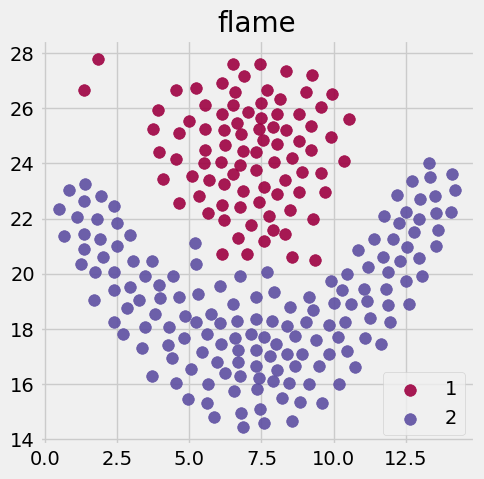

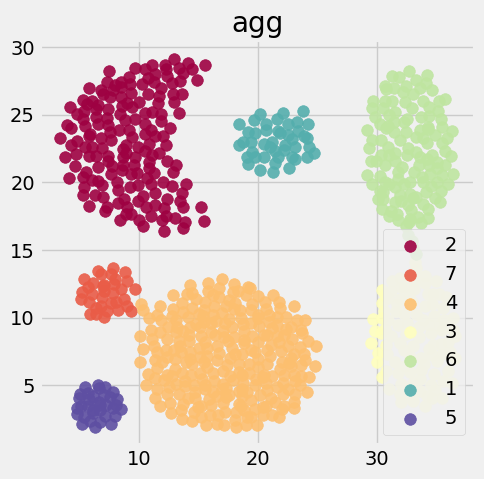

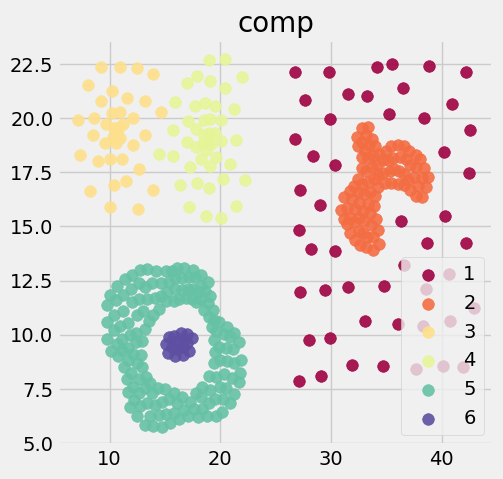

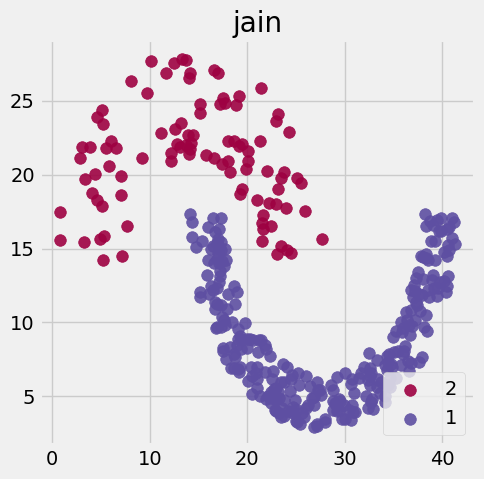

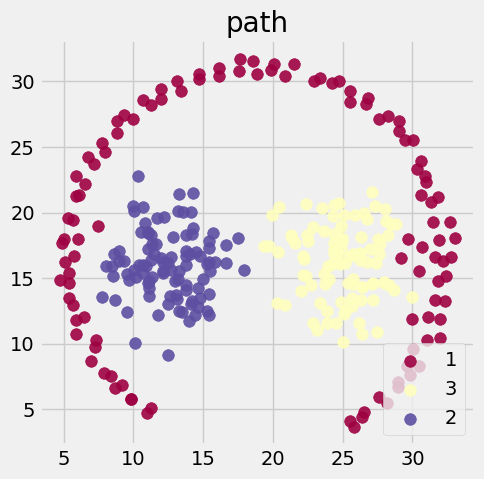

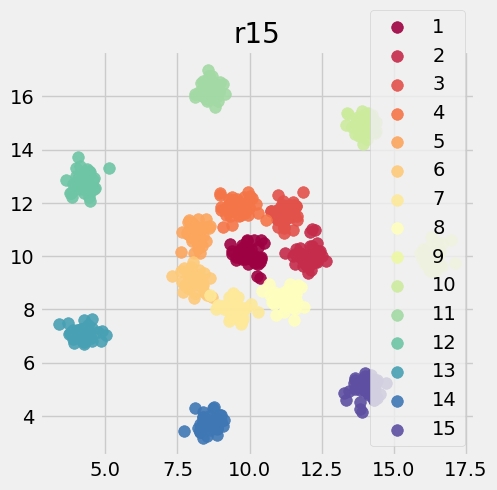

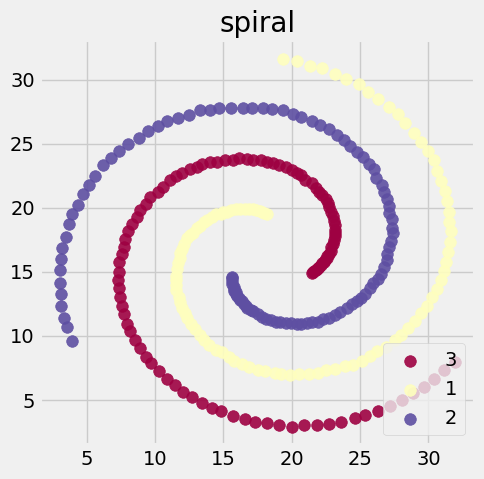

[None, None, None, None, None, None, None]

In [7]:
# Plot each dataframe with the true cluster labels
[plot_clusters(df, title) for df, title in dfs]

---

### 3) Write a plotting function (or functions) to compare the performance of the three clustering algorithms.

Load in the three clustering algorithms we covered earlier in the class.

    K-means: k-means clustering.
    Agglomerative clustering: hierarchical clustering (bottom up).
    DBSCAN: density-based clustering.
    
Your function(s) should allow you to visually examine the effects of changing different parameters in the clustering algorithms. The parameters you should explore, at minimum, are:

    K-means:
        n_clusters
    Agglomerative clustering:
        n_clusters
    DBSCAN
        eps
        min_samples
        
Feel free to explore other parameters for these models.


In [8]:
def plot_clust_alg(df, title, n_clusters_kmeans=3, n_clusters_agg=3,
                         dbscan_eps=3, dbscan_min_samples=5):
    """
    Visualize clusters using different clustering algorithms.
    
    Parameters:
        df (DataFrame): The DataFrame containing data points and their associated cluster labels.
        title (str): The title for the plot.
        n_clusters_kmeans (int): Number of clusters for K-Means.
        n_clusters_agg (int): Number of clusters for Agglomerative Clustering.
        dbscan_eps (float): Maximum distance between two samples for DBSCAN.
        dbscan_min_samples (int): The minimum number of samples in a neighborhood for DBSCAN.
    """
    # Create a figure with 4 subplots in a row
    fig, axarr = plt.subplots(1, 4, figsize=(24, 7))
    
    # TRUE clusters (based on provided labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(df.label.unique())))
    
    for label, color in zip(df.label.unique(), colors):
        X_ = df[df.label == label]
        axarr[0].scatter(X_.iloc[:, 0], X_.iloc[:, 1], s=70, color=color, label=label, alpha=0.9)
        
    axarr[0].set_title(title + ' ' + 'true', fontsize=20)
    axarr[0].legend(loc='lower right')
    
    # Preprocess data: Scale matrix and create a DataFrame
    X = df.iloc[:, 0:2]
    X = scale_matrix(X)  # Assuming you have a function for scaling
    X = pd.DataFrame(X, index=df.index)
    
    # K-MEANS clustering
    kmeans = KMeans(n_clusters=n_clusters_kmeans, n_init='auto')
    kmeans.fit(X.iloc[:, 0:2])
    
    X['kmeans_label'] = kmeans.labels_

    sil = silhouette_score(X, kmeans.labels_)
    print(f"Kmeans SILHOUETTE SCORE = {sil}")
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(X.kmeans_label.unique())))
    
    for label, color in zip(X.kmeans_label.unique(), colors):
        X_ = X[X.kmeans_label == label]
        axarr[1].scatter(X_.iloc[:, 0], X_.iloc[:, 1], s=70, color=color, label=label, alpha=0.9)
        
    axarr[1].set_title(title + ' ' + 'kmeans', fontsize=20)
    axarr[1].legend(loc='lower right')
    
    # HIERARCHICAL/AGGLOMERATIVE clustering
    aggclust = AgglomerativeClustering(n_clusters=n_clusters_agg)
    aggclust.fit(X.iloc[:, 0:2])
    
    X['aggclust_label'] = aggclust.labels_

    sil = silhouette_score(X, aggclust.labels_)
    print(f"Agglomerative Clustering SILHOUETTE SCORE = {sil}")
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(X.aggclust_label.unique())))
    
    for label, color in zip(X.aggclust_label.unique(), colors):
        X_ = X[X.aggclust_label == label]
        axarr[2].scatter(X_.iloc[:, 0], X_.iloc[:, 1], s=70, 
                         color=color, label=label, alpha=0.9)
        
    axarr[2].set_title(title + ' ' + 'agglomerative', fontsize=20)
    axarr[2].legend(loc='lower right')
    
    # DBSCAN clustering
    dbscan = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples)
    dbscan.fit(X.iloc[:, 0:2])
    
    X['dbscan_label'] = dbscan.labels_

    sil = silhouette_score(X, dbscan.labels_)
    print(f"DBSCAN SILHOUETTE SCORE = {sil}")
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(X.dbscan_label.unique())))
    
    for label, color in zip(X.dbscan_label.unique(), colors):
        X_ = X[X.dbscan_label == label]
        axarr[3].scatter(X_.iloc[:, 0], X_.iloc[:, 1], s=70, 
                         color=color, label=label, alpha=0.9)
        
    axarr[3].set_title(title + ' ' + 'DBSCAN', fontsize=20)
    axarr[3].legend(loc='lower right')
    
    # Show the entire plot
    plt.show()


### But first: Let's write a function that scales our data for us.
Why do we need to scale our data for clustering algorithms? (thread)

In [9]:
# Write your function to scale data here.
def scale_matrix(X):
    """
    Scale the input matrix using StandardScaler.
    
    Parameters:
        X (array-like): The input matrix to be scaled.
        
    Returns:
        scaled_X (array-like): The scaled matrix.
    """
    # Create a StandardScaler instance
    sc = StandardScaler()
    
    # Fit the scaler and transform the input matrix
    scaled_X = sc.fit_transform(X)
    
    return scaled_X


## 4) Tinkering with clustering parameters.

In the following sections, look at how the parameters affect the clustering algorithms and try to get clusters that make sense. There is no right answer here, as these are unsupervised techniques.

Don't forget to check out **silhouette scores!**

### 4.A) Find good parameters for the `flame` data set.

Which algorithm (visually) performs best?

Kmeans SILHOUETTE SCORE = 0.43869782313675754
Agglomerative Clustering SILHOUETTE SCORE = 0.43236598782197966
DBSCAN SILHOUETTE SCORE = 0.2950438525479491


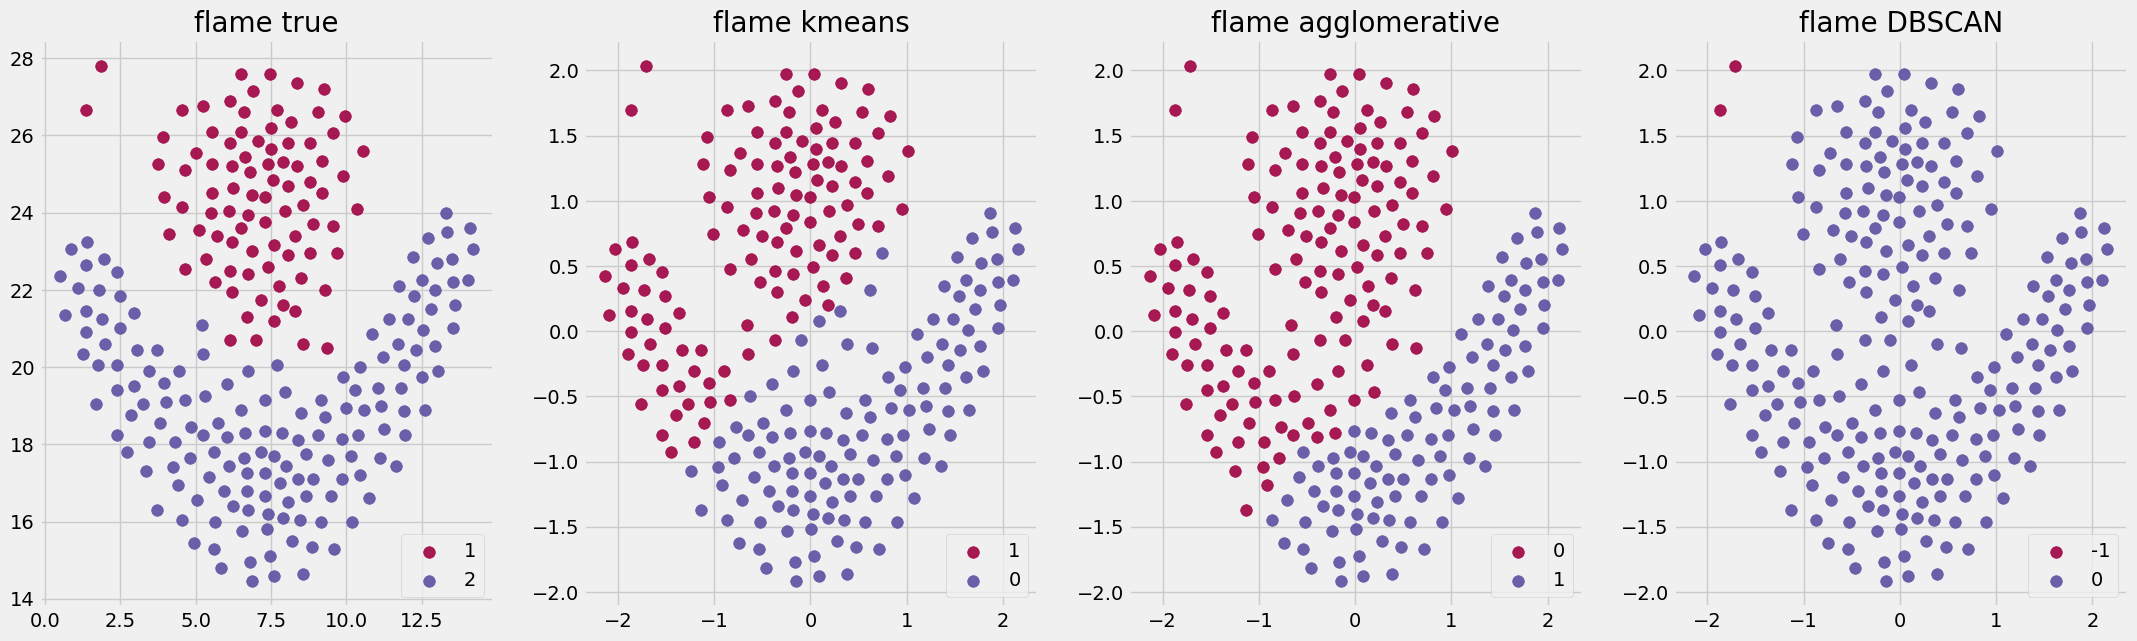

In [10]:
plot_clust_alg(flame, 'flame', n_clusters_kmeans=2, n_clusters_agg=2, dbscan_eps=0.3, dbscan_min_samples=3)

Kmeans looks the best visually

---

### 4.B) Find good parameters for the `agg` data set.

Which algorithm (visually) performs best?

Kmeans SILHOUETTE SCORE = 0.7488995742474461
Agglomerative Clustering SILHOUETTE SCORE = 0.5952371953236091
DBSCAN SILHOUETTE SCORE = 0.4608603819373561


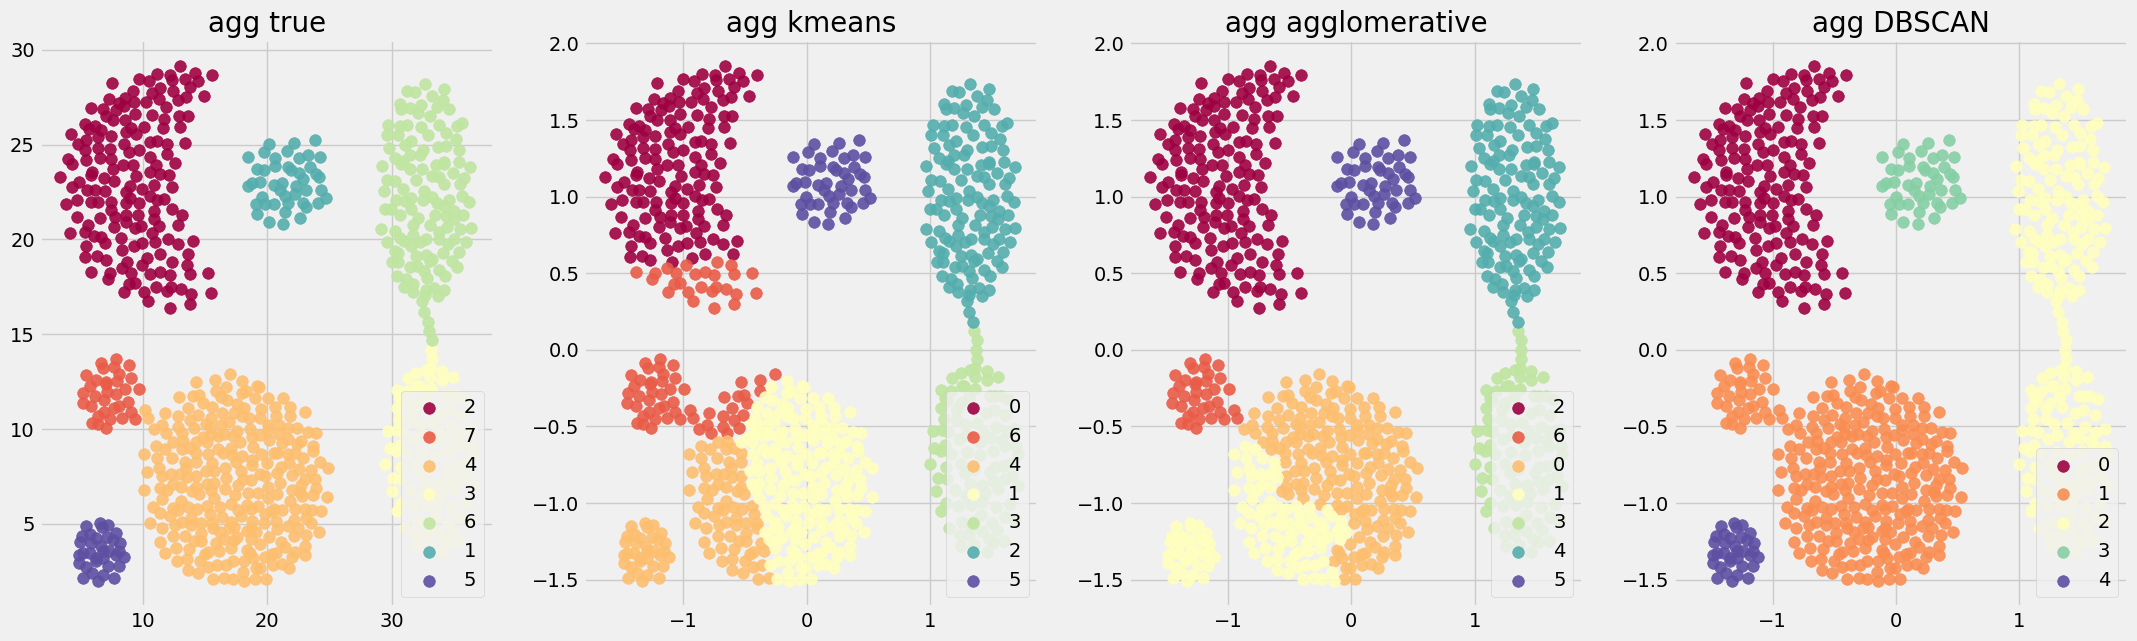

In [11]:
plot_clust_alg(agg, 'agg', n_clusters_kmeans=7, n_clusters_agg=7, dbscan_eps=0.2, dbscan_min_samples=5)

Agglomerative performs the best visually

---

### 4.C) Find good parameters for the `comp` data set.

Which algorithm (visually) performs best?

Kmeans SILHOUETTE SCORE = 0.7080832232811713
Agglomerative Clustering SILHOUETTE SCORE = 0.6041271665625365
DBSCAN SILHOUETTE SCORE = 0.2022102865965858


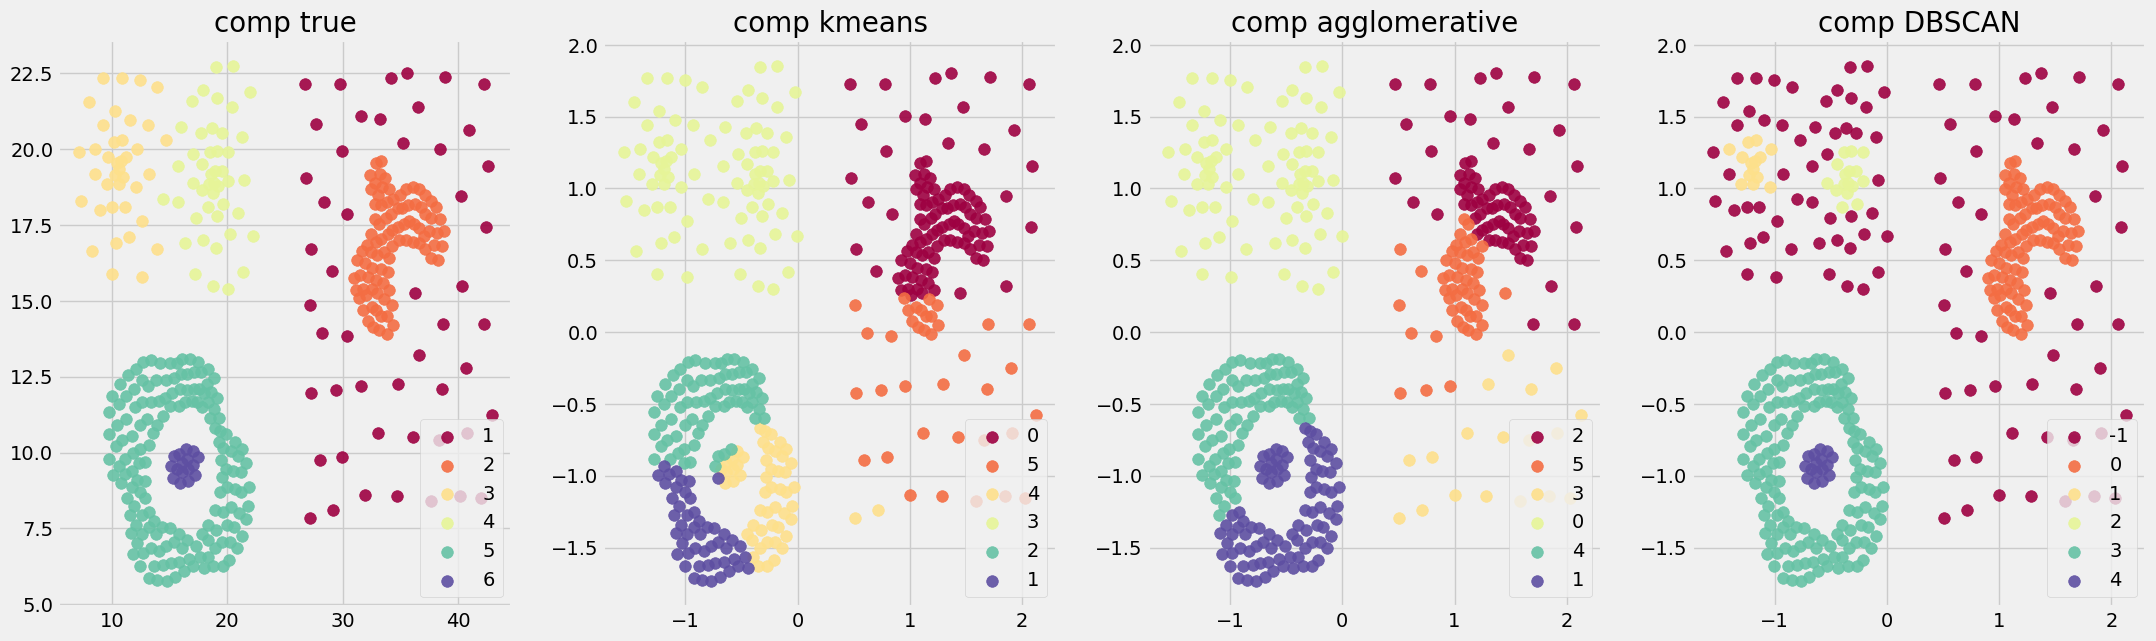

In [12]:
plot_clust_alg(comp, 'comp', n_clusters_kmeans=6, n_clusters_agg=6, dbscan_eps=0.15, dbscan_min_samples=7)

DBSCAN performs the best visually

---

### 4.D) Find good parameters for the `jain` data set.

Which algorithm (visually) performs best?

Kmeans SILHOUETTE SCORE = 0.5528665076324064
Agglomerative Clustering SILHOUETTE SCORE = 0.5812767551129614
DBSCAN SILHOUETTE SCORE = 0.5022846573318366


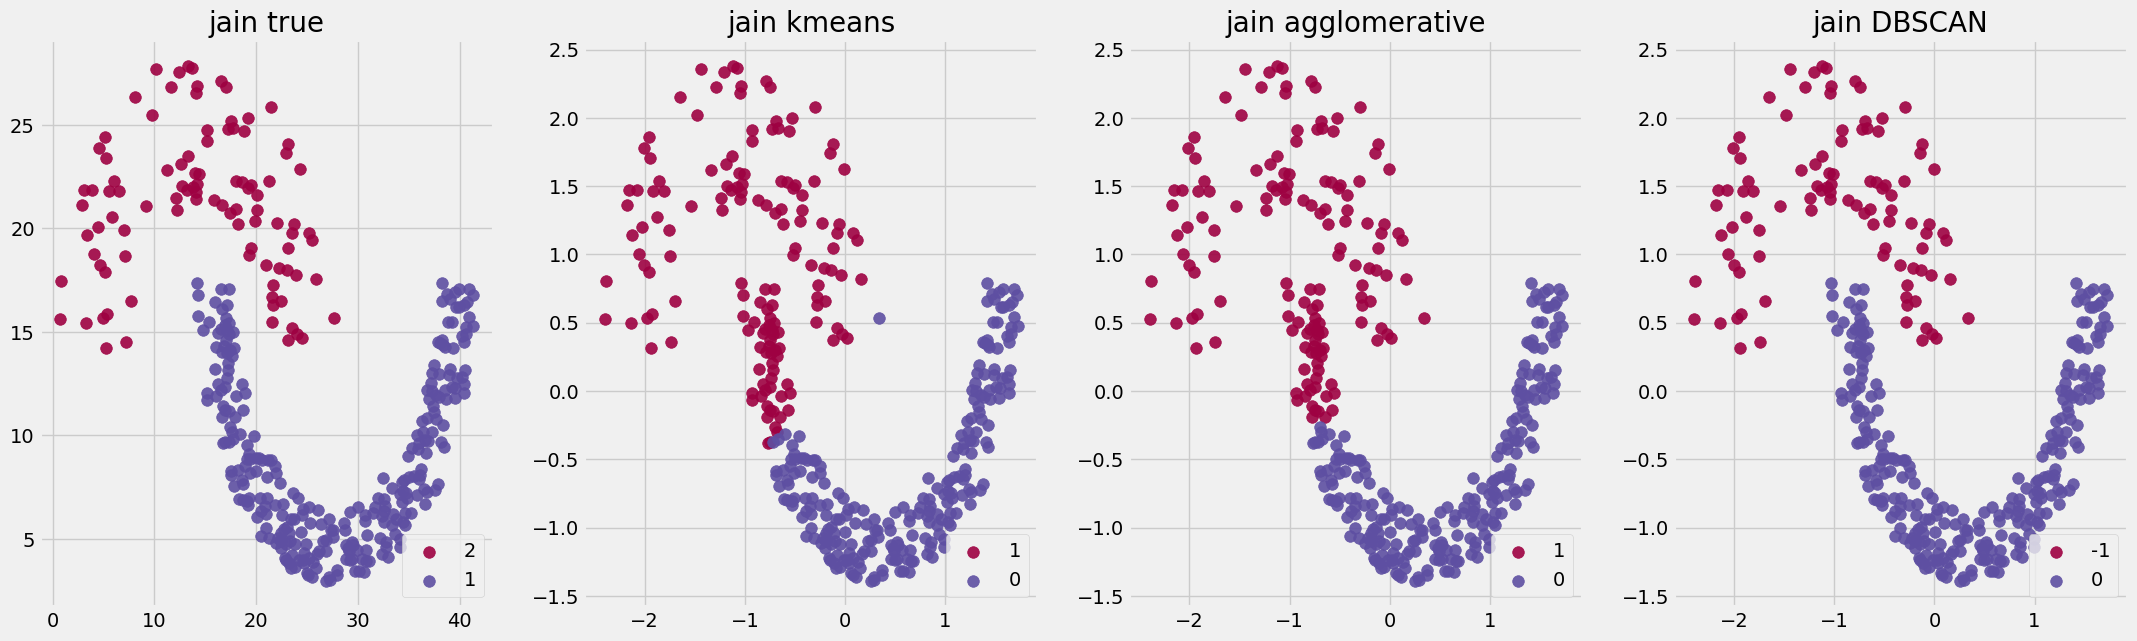

In [13]:
plot_clust_alg(jain, 'jain', n_clusters_kmeans=2, n_clusters_agg=2, dbscan_eps=0.25, dbscan_min_samples=15)

DBSCAN performs best visually

---

### 4.E) Find good parameters for the `pathbased` data set.

Which algorithm (visually) performs best?

Kmeans SILHOUETTE SCORE = 0.6217702595527734
Agglomerative Clustering SILHOUETTE SCORE = 0.651262763201683
DBSCAN SILHOUETTE SCORE = 0.4176472776743596


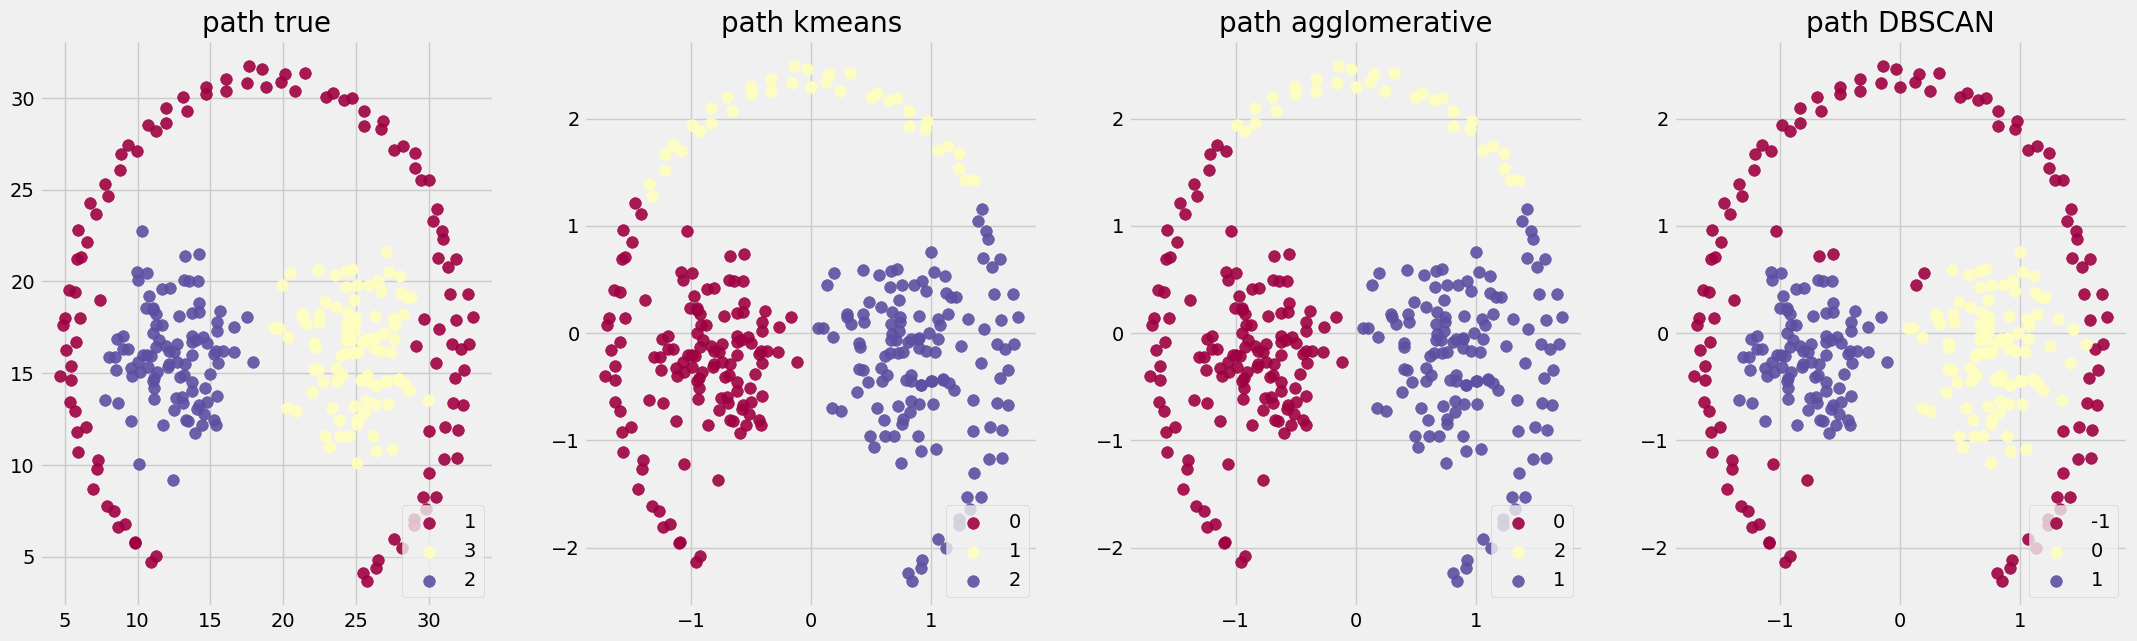

In [14]:
plot_clust_alg(path, 'path', n_clusters_kmeans=3, n_clusters_agg=3, dbscan_eps=0.3, dbscan_min_samples=10)

DBSCAN looks the best visually

---

### 4.F) Find good parameters for the `r15` data set.

Which algorithm (visually) performs best?

Kmeans SILHOUETTE SCORE = 0.8855167390809046
Agglomerative Clustering SILHOUETTE SCORE = 0.7746382499754562
DBSCAN SILHOUETTE SCORE = 0.24848317611353385


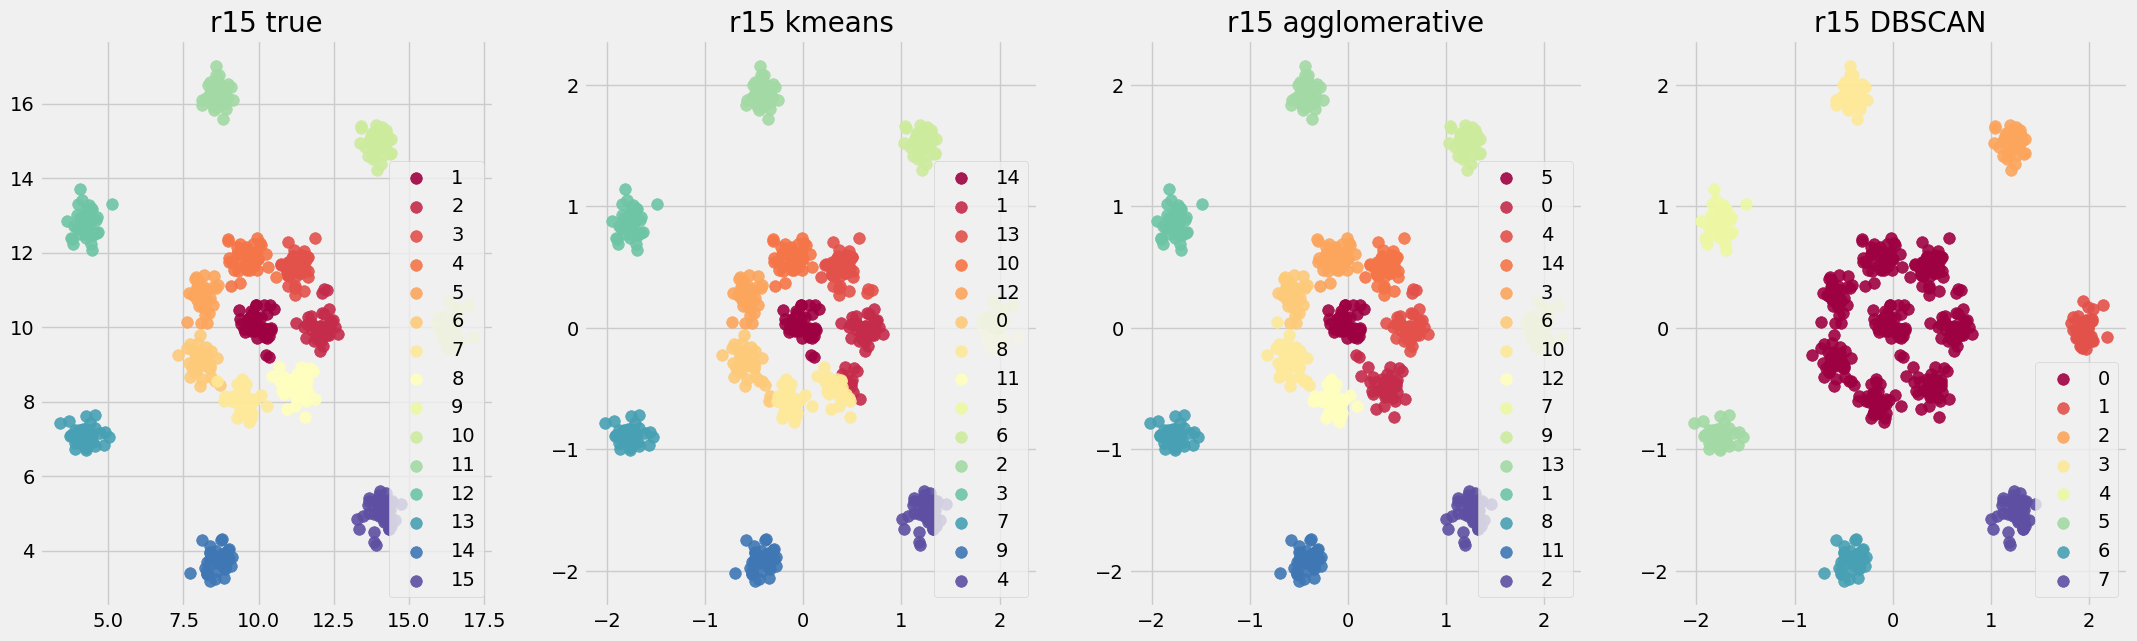

In [15]:
plot_clust_alg(r15, 'r15', n_clusters_kmeans=15, n_clusters_agg=15, dbscan_eps=0.35, dbscan_min_samples=3)

Kmeans looks the best visually

---

### 4.G) Find good parameters for the `spiral` data set.

Which algorithm (visually) performs best?

Kmeans SILHOUETTE SCORE = 0.49249273381821157
Agglomerative Clustering SILHOUETTE SCORE = 0.41188669340426015
DBSCAN SILHOUETTE SCORE = 0.1091925522848507


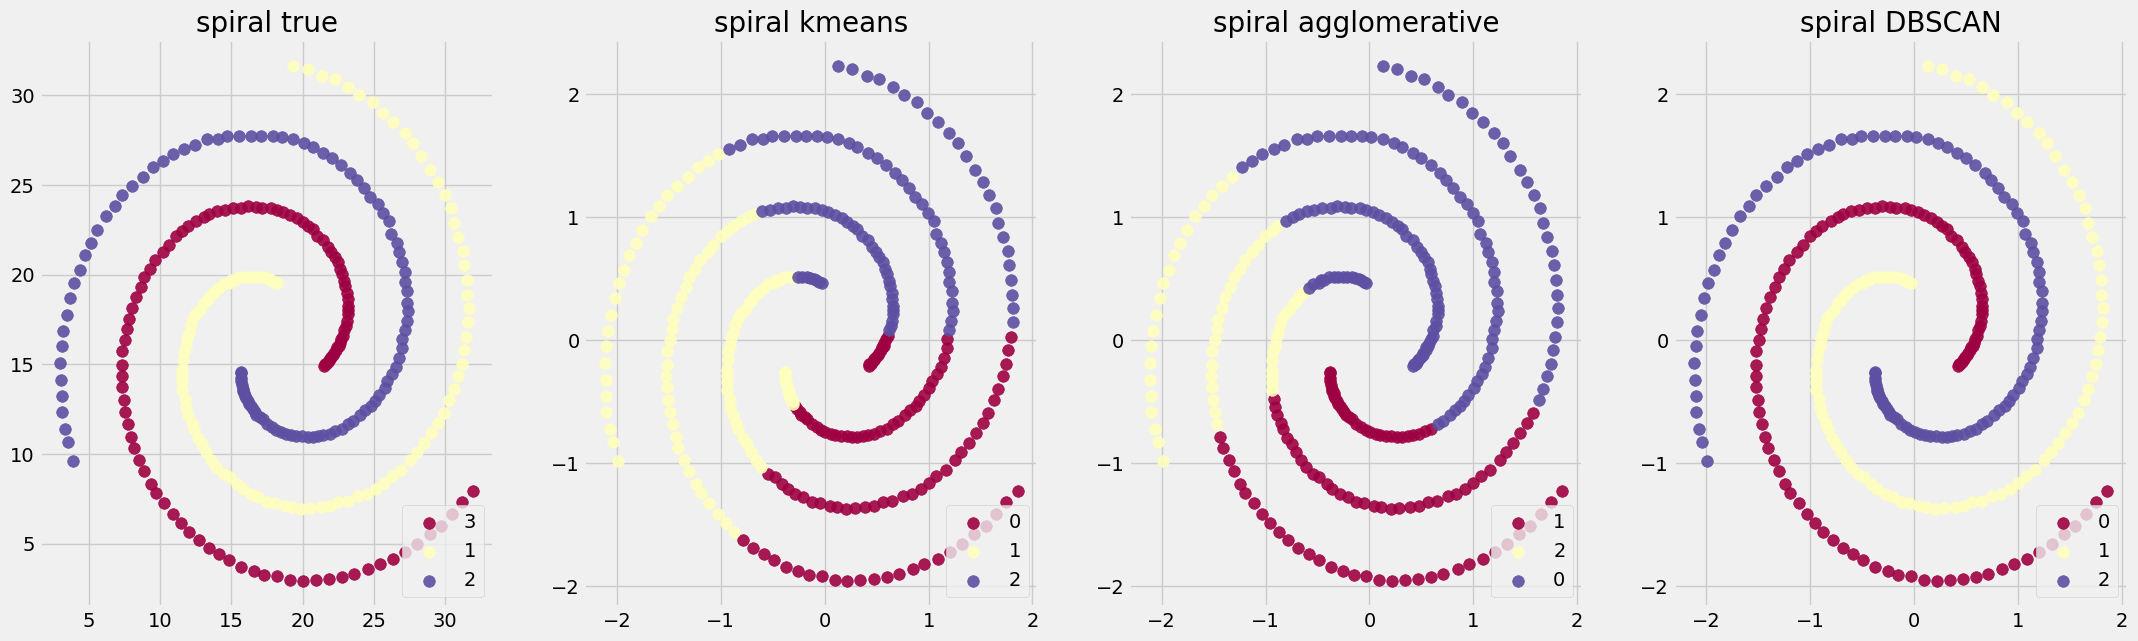

In [16]:
plot_clust_alg(spiral, 'spiral', n_clusters_kmeans=3, n_clusters_agg=3, dbscan_eps=0.5, dbscan_min_samples=5)

DBSCAN looks the best visually

## 5) Melbourne Housing
Data come from [this](https://www.kaggle.com/anthonypino/melbourne-housing-market) Kaggle page.

In [17]:
mel = pd.read_csv('datasets/melbourne.csv')
mel.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### 5a) Fix bad variable names
We're only going to look at three variables here, and two of them are spelled wrong! Change the lat/long column names to either be spelled correctly or abbrevited as `lat`/`long`. While we're add it, let's change `Price` --> `price`.

In [18]:
# Rename columns
mel.rename(columns={
    'Longtitude': 'long',
    'Lattitude': 'lat',
    'Price': 'price'
}, inplace=True)

### 5b) Drop missings
Drop all rows where either `lat`, `long`, or `price` is missing.

In [19]:
# Dropping rows
mel = mel[mel.lat.notnull() & mel.long.notnull() & mel.price.notnull()]

### 5c) Plot lat vs long
What kind of clustering do you want to do?

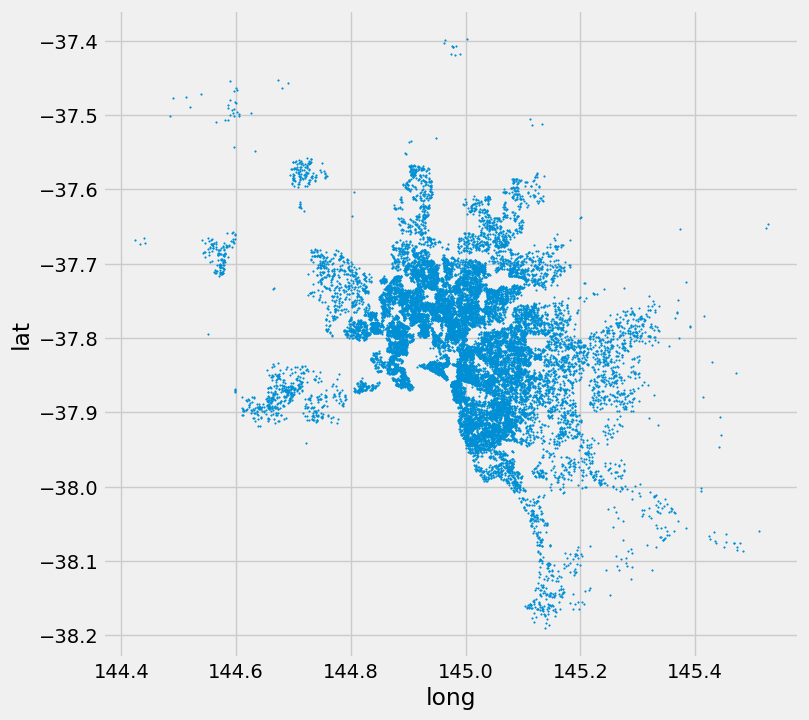

In [20]:
# Plotting latitude vs longitude 
mel.plot(kind='scatter', x='long', y='lat', s=1, figsize=(8, 8));

### 5d) Prepare X matrix by scaling
Why do we need to scale? (thread)

In [21]:
# Scaling X matrix
X = mel.loc[:, ['lat', 'long']]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

### 5e) Cluster and plot clusters

In [22]:
# Fitting KMeans with 20 clusters, can try others
km = KMeans(n_clusters=20, n_init='auto')
km.fit(X_sc)
mel['cluster'] = km.labels_

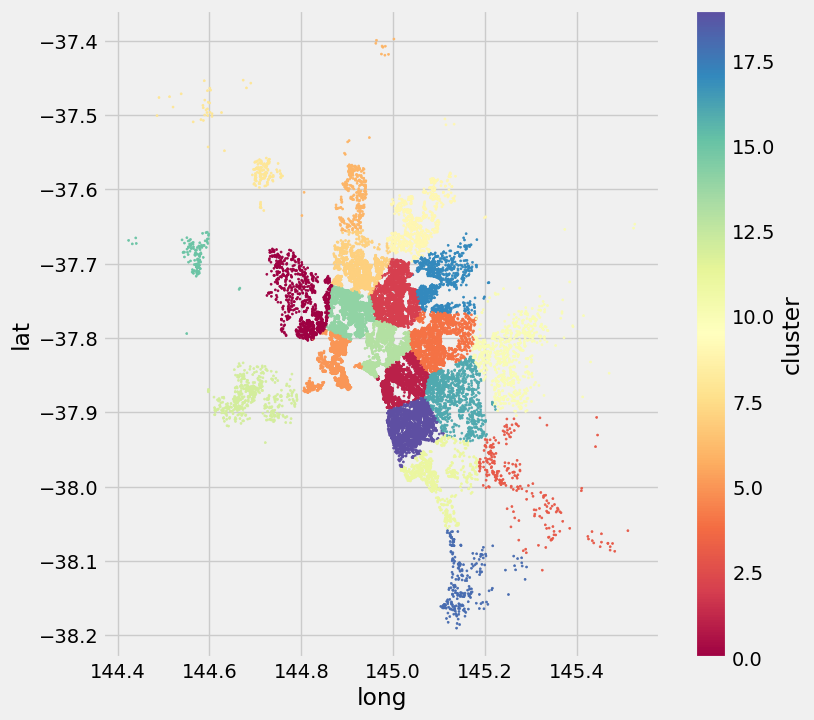

In [23]:
# Plot 20 clusters differentitated by color
mel.plot(
    kind='scatter',
    x='long',
    y='lat',
    c='cluster',
    colormap='Spectral',
    s=2,
    figsize=(8, 8)
);

### 5f) Do prices differ by cluster?

In [24]:
# Find the mean of cluster prices
mel.groupby('cluster').price.mean()

cluster
0     6.838913e+05
1     1.391528e+06
2     9.771227e+05
3     7.034095e+05
4     1.689203e+06
5     1.000926e+06
6     5.970464e+05
7     7.382267e+05
8     5.936356e+05
9     6.410540e+05
10    9.491810e+05
11    1.072440e+06
12    5.747936e+05
13    1.263465e+06
14    1.003656e+06
15    4.371904e+05
16    1.293515e+06
17    9.619556e+05
18    7.328170e+05
19    1.359289e+06
Name: price, dtype: float64

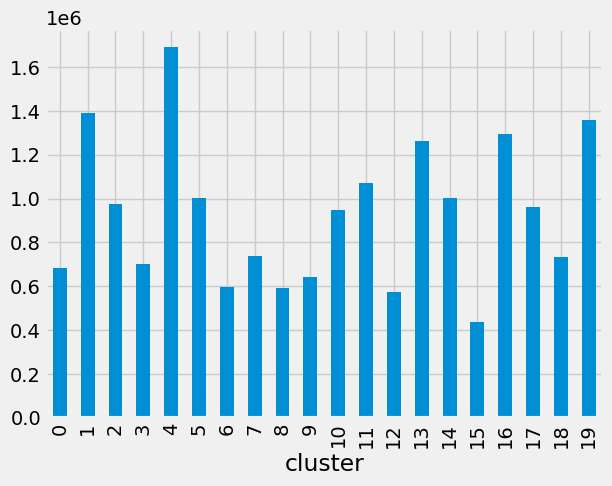

In [26]:
# Plot the mean prices of clusters
mel.groupby('cluster').price.mean().plot(kind='bar');